Saving DSC_0230.jpg to DSC_0230.jpg


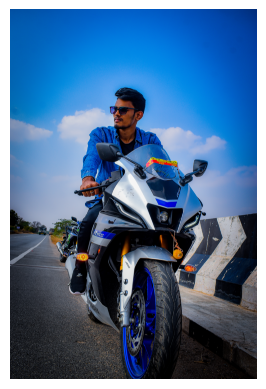

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/506 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1258: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


Generated caption: a man sitting on a motorcycle


In [1]:
from google.colab import files
from PIL import Image
import matplotlib.pyplot as plt

# Upload the file
uploaded = files.upload()

# Open and display the image
for fn in uploaded.keys():
    img = Image.open(fn)
    plt.imshow(img)
    plt.axis('off')  # Hide axes
    plt.show()

!pip install transformers
!pip install torch

from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image
import requests

# Load the BLIP model and processor
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

# Load your image (assuming it was uploaded as shown above)
for fn in uploaded.keys():
    image = Image.open(fn)

# Preprocess the image
inputs = processor(image, return_tensors="pt")

# Generate a caption
out = model.generate(**inputs)
caption = processor.decode(out[0], skip_special_tokens=True)
print("Generated caption:", caption)